In [1]:
# Add the dependencies

import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf


<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

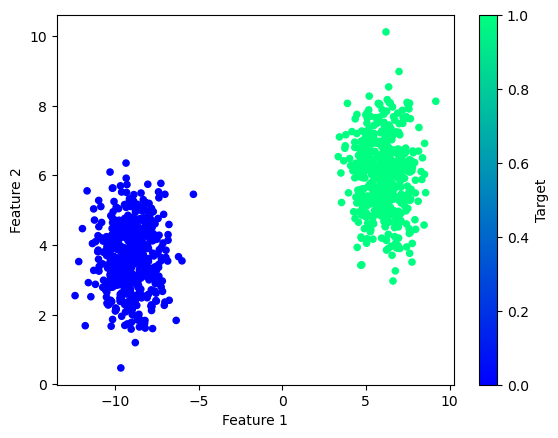

In [2]:
# Generate dummy data

x, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Create a DataFrame for the dummy data

dummy_df = pd.DataFrame(x, columns=['Feature 1', 'Feature 2'])

dummy_df['Target'] = y

# Plot the dummy data

dummy_df.plot.scatter(x='Feature 1', y='Feature 2', c='Target', colormap='winter')

In [3]:
# Split the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=78)


In [4]:
# Create a scaler instance

x_scaler = skl.preprocessing.StandardScaler()

# Train the scaler
x_scaler.fit(X_train)

# Scale the data
X_train_scaled = x_scaler.transform(X_train)
X_test_scaled = x_scaler.transform(X_test)


In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation='relu', input_dim=2))

# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the model structure
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Compile the model, customize metrics
nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# Fit the model to the training data.
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 1ms/step - loss: 0.6900 - accuracy: 0.5280
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6823 - accuracy: 0.5560
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6752 - accuracy: 0.5827
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6689 - accuracy: 0.5973
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6625 - accuracy: 0.6080
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6557 - accuracy: 0.6213
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6480 - accuracy: 0.6520
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6395 - accuracy: 0.7067
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6301 - accuracy: 0.7280
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6200 - accuracy: 0.7413
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.0942 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0926 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0911 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0896 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0882 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0868 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0854 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0841 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0828 - accuracy: 1.0000
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0815 - accuracy: 1.0000
Epoch 93/100


In [8]:
# Evaluate the model's performance using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)

print(f'Loss: {model_loss}, Accuracy: {model_accuracy}')

8/8 - 0s - loss: 0.0678 - accuracy: 1.0000 - 147ms/epoch - 18ms/step
Loss: 0.06775860488414764, Accuracy: 1.0


In [10]:
# Predict the classification of a new dummy dataset
new_X, new_y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

new_X_scaled = x_scaler.transform(new_X)

(nn_model.predict(new_X_scaled) > 0.5).astype('int32')

32/32 [==============================] - 0s 806us/step


array([[1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
    

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

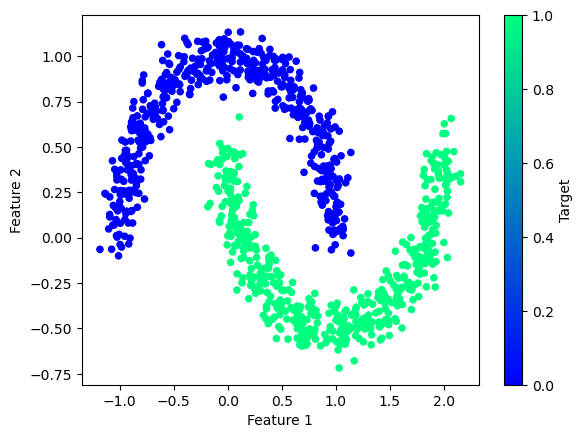

In [11]:
# Create a non-linear dummy dataset

from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1,1)

# Create a DataFrame to plot the non-linear data
moons_df = pd.DataFrame(X_moons, columns=['Feature 1', 'Feature 2'])
moons_df['Target'] = y_moons

# Plot the data
moons_df.plot.scatter(x='Feature 1', y='Feature 2', c='Target', colormap='winter')


In [12]:
# Create training and testing data sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(X_moons, y_moons, random_state=78)

# Create the scaler instance
x_moon_scaler = skl.preprocessing.StandardScaler()

# Train the scaler
x_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = x_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = x_moon_scaler.transform(X_moon_test)

In [13]:
# Train the model with the non-linear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)


Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.7023 - accuracy: 0.7000
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6350 - accuracy: 0.7107
Epoch 3/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5827 - accuracy: 0.7200
Epoch 4/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5470 - accuracy: 0.7320
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5193 - accuracy: 0.7400
Epoch 6/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4973 - accuracy: 0.7453
Epoch 7/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4795 - accuracy: 0.7547
Epoch 8/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4638 - accuracy: 0.7667
Epoch 9/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4507 - accuracy: 0.7707
Epoch 10/100
24/24 [==============================] - 0s 1ms/step - loss: 0.4391 - accuracy: 0.7773
Epoch 11/

24/24 [==============================] - 0s 1ms/step - loss: 0.2611 - accuracy: 0.8920
Epoch 84/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2608 - accuracy: 0.8920
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2606 - accuracy: 0.8920
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2604 - accuracy: 0.8920
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2602 - accuracy: 0.8920
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2599 - accuracy: 0.8920
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2598 - accuracy: 0.8920
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2596 - accuracy: 0.8920
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2594 - accuracy: 0.8920
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2592 - accuracy: 0.8920
Epoch 93/100


<AxesSubplot:>

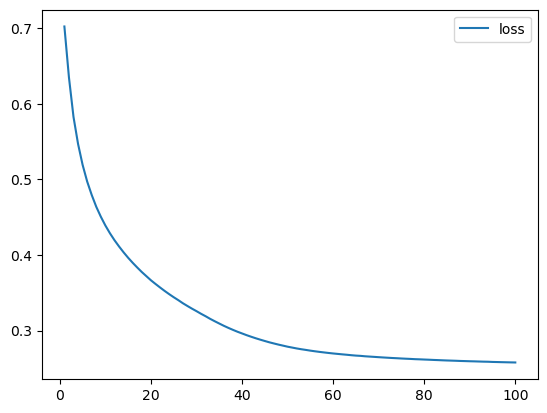

In [14]:
# Create a DataFrame for the training history

history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history['loss'])+1))

# Plot the loss
history_df.plot(y='loss')

<AxesSubplot:>

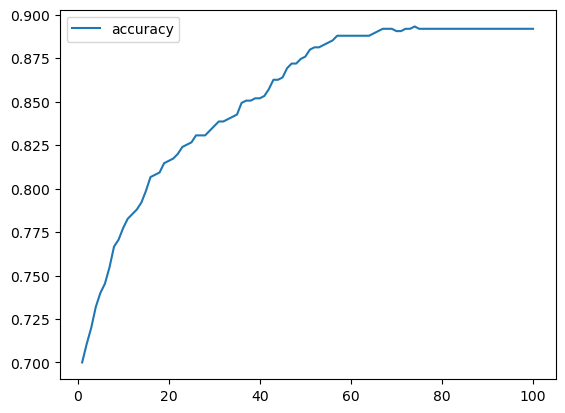

In [15]:
# Plot the accuracy
history_df.plot(y='accuracy')